In [7]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# Leer csv
df_tiendas = pd.read_csv('/content/drive/MyDrive/2024/2do Cuatri - 2024/Proyecto Final/TP Proyecto/Entrega 3/Codigo E3/resultado_m1_m2.csv')
df_geo = pd.read_csv('/content/drive/MyDrive/2024/2do Cuatri - 2024/Proyecto Final/TP Proyecto/Código/tiendas_caba_v4.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_tiendas.columns

Index(['cantidad_ordenes', 'cantidad_proveedores', 'porcentaje_max_supplier',
       'promedio_ordenes_mes', 'porcentaje_descuento_total',
       'proporcion_ordenes_descuentos', 'promedio_por_pedido', 'customer_id',
       'cluster', 'predicted_cluster'],
      dtype='object')

In [ ]:
df_geo.columns

Index(['id', 'lat', 'lon', 'geometry', 'estaciones_servicio_200mts',
       'estaciones_servicio_1000mts', 'subtes_200mts', 'subtes_1000mts',
       'id_rc', 'porc_nbi', 'hacinamiento', 'densidad_pob', 'porc_mujeres',
       'porc_varones', 'uni_privada_200mts', 'uni_publica_200mts',
       'uni_privada_1000mts', 'uni_publica_1000mts', 'estadios_200mts',
       'estadios_1000mts', 'river_1500mts', 'boca_1500mts', 'clubes_200mts',
       'clubes_1000mts', 'tienda_mas_cercana', 'escuelas_cercanas_200m',
       'escuelas_cercanas_1000m', 'paradas_cercanas_200m',
       'paradas_cercanas_1000m', 'everdes_cercanos_200m',
       'everdes_cercanos_1000m', 'hay_bicicleteros_200m',
       'hospitales_cercanos_200m', 'hospitales_cercanos_1000m',
       'distancia_al_hospital_mas_cercano', 'parroquias_cercanas_200m',
       'parroquias_cercanas_1000m', 'comuna', 'negocios_cercanos_200m',
       'negocios_cercanos_1000m', 'tiendas_cercanas_200m',
       'supermercados_200m', 'supermercados_1000m',

In [ ]:
# Merge
df_tiendas = df_tiendas.merge(df_geo[['id', 'lon', 'lat']], left_on='customer_id', right_on='id', how='left')

In [ ]:
# Opcional: Si no quieres conservar la columna 'id' después del merge
df_tiendas = df_tiendas.drop('customer_id', axis=1)

In [ ]:
pip install geopandas matplotlib contextily

In [ ]:
from shapely.geometry import Point
import geopandas as gpd

# Crear la columna 'geometry' en df_tiendas a partir de 'lon' y 'lat'
df_tiendas['geometry'] = df_tiendas.apply(lambda row: Point(row['lon'], row['lat']), axis=1)

# Convertir el DataFrame a un GeoDataFrame
gdf_tiendas = gpd.GeoDataFrame(df_tiendas, geometry='geometry')

# Asegurarse de que el CRS esté bien definido (CABA está en WGS84, EPSG:4326)
gdf_tiendas.crs = "EPSG:4326"

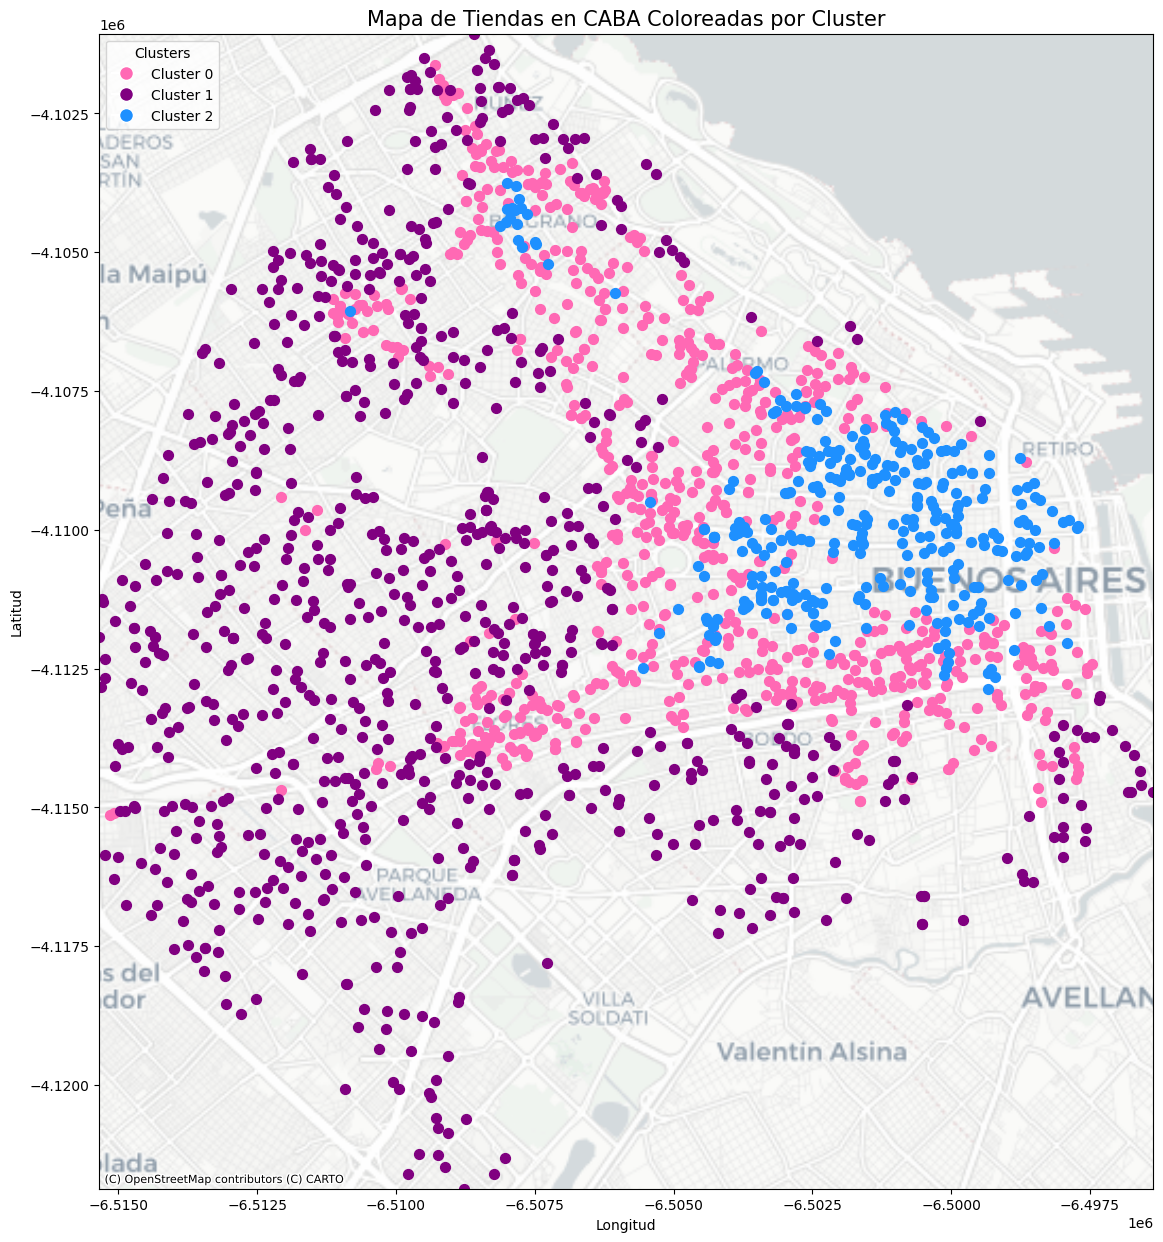

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from matplotlib.lines import Line2D
import numpy as np

# Convertir las coordenadas a EPSG:3857 para usar tiles de fondo con contextily
gdf_tiendas = gdf_tiendas.to_crs(epsg=3857)

# Definir colores para los clusters
cluster_color_map = {
    0: '#FF69B4',   # Cluster 0 (Rosa)
    1: 'purple',   # Cluster 1
    2: '#1E90FF',   # Cluster 2 (Dodger Blue)
}

# Crear el gráfico
fig, ax = plt.subplots(figsize=(15, 15))  # Aumentar el tamaño del gráfico

# Graficar las tiendas, usando la columna 'cluster' para el color
for cluster, color in cluster_color_map.items():
    tiendas_cluster = gdf_tiendas[gdf_tiendas['cluster'] == cluster]
    tiendas_cluster.plot(ax=ax, color=color, markersize=50, label=f'Cluster {cluster}')

# Añadir un fondo de mapa más minimalista
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Ajustar los límites del gráfico para enfocarse menos en CABA
# Ajustamos los márgenes para tener una vista más amplia
xlim = gdf_tiendas.total_bounds[[0, 2]] + np.array([-0.5, 0.5])  # Aumentar aún más el margen de longitud
ylim = gdf_tiendas.total_bounds[[1, 3]] + np.array([-0.5, 0.5])  # Aumentar aún más el margen de latitud
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Añadir títulos y etiquetas
plt.title('Mapa de Tiendas en CABA Coloreadas por Cluster', fontsize=15)
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Crear una leyenda personalizada
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=color, markersize=10)
                   for cluster, color in cluster_color_map.items()]
ax.legend(handles=legend_elements, title="Clusters", loc='upper left')

# Mostrar el gráfico
plt.show()

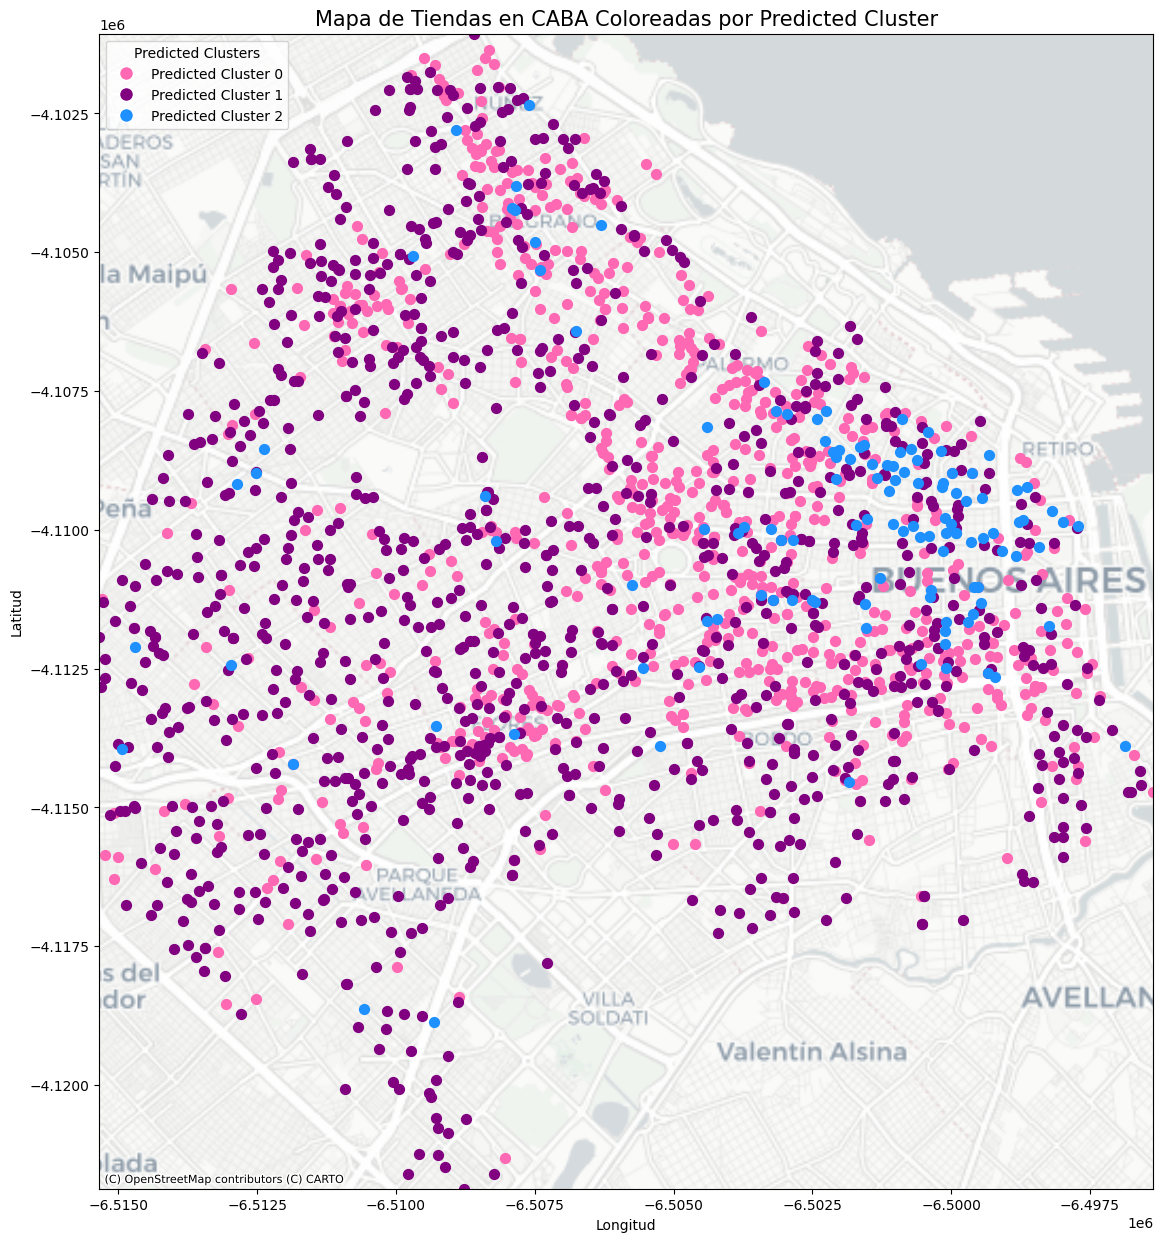

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from matplotlib.lines import Line2D
import numpy as np

# Convertir las coordenadas a EPSG:3857 para usar tiles de fondo con contextily
gdf_tiendas = gdf_tiendas.to_crs(epsg=3857)

# Definir colores para los clusters
cluster_color_map = {
    0: '#FF69B4',   # Cluster 0 (Rosa)
    1: 'purple',   # Cluster 1
    2: '#1E90FF',   # Cluster 2 (Dodger Blue)
}

# Crear el gráfico
fig, ax = plt.subplots(figsize=(15, 15))  # Aumentar el tamaño del gráfico

# Graficar las tiendas, usando la columna 'predicted_cluster' para el color
for cluster, color in cluster_color_map.items():
    tiendas_cluster = gdf_tiendas[gdf_tiendas['predicted_cluster'] == cluster]
    tiendas_cluster.plot(ax=ax, color=color, markersize=50, label=f'Predicted Cluster {cluster}')

# Añadir un fondo de mapa más minimalista
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Ajustar los límites del gráfico para enfocarse menos en CABA
# Ajustamos los márgenes para tener una vista más amplia
xlim = gdf_tiendas.total_bounds[[0, 2]] + np.array([-0.5, 0.5])  # Aumentar el margen de longitud
ylim = gdf_tiendas.total_bounds[[1, 3]] + np.array([-0.5, 0.5])  # Aumentar el margen de latitud
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Añadir títulos y etiquetas
plt.title('Mapa de Tiendas en CABA Coloreadas por Predicted Cluster', fontsize=15)
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Crear una leyenda personalizada
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Predicted Cluster {cluster}',
                          markerfacecolor=color, markersize=10)
                   for cluster, color in cluster_color_map.items()]
ax.legend(handles=legend_elements, title="Predicted Clusters", loc='upper left')

# Mostrar el gráfico
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

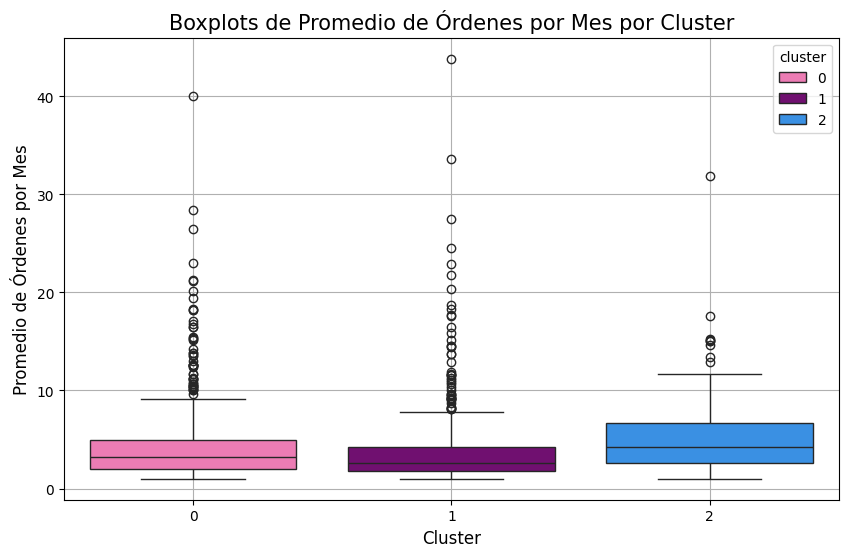

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que df_tiendas es tu DataFrame
# Filtrar registros donde cluster y predicted_cluster son iguales
df_filtered = df_tiendas[df_tiendas['cluster'] == df_tiendas['predicted_cluster']]

# Crear el gráfico de boxplots
plt.figure(figsize=(10, 6))

# Graficar boxplots para cada cluster
sns.boxplot(data=df_filtered,
            x='cluster',
            y='promedio_ordenes_mes',
            hue='cluster',  # Asignar cluster a hue
            dodge=False,  # Para evitar separación de los colores
            palette=cluster_color_map)  # Color personalizado

# Añadir títulos y etiquetas
plt.title('Boxplots de Promedio de Órdenes por Mes por Cluster', fontsize=15)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Promedio de Órdenes por Mes', fontsize=12)

# Mostrar el gráfico
plt.grid(True)
plt.show()

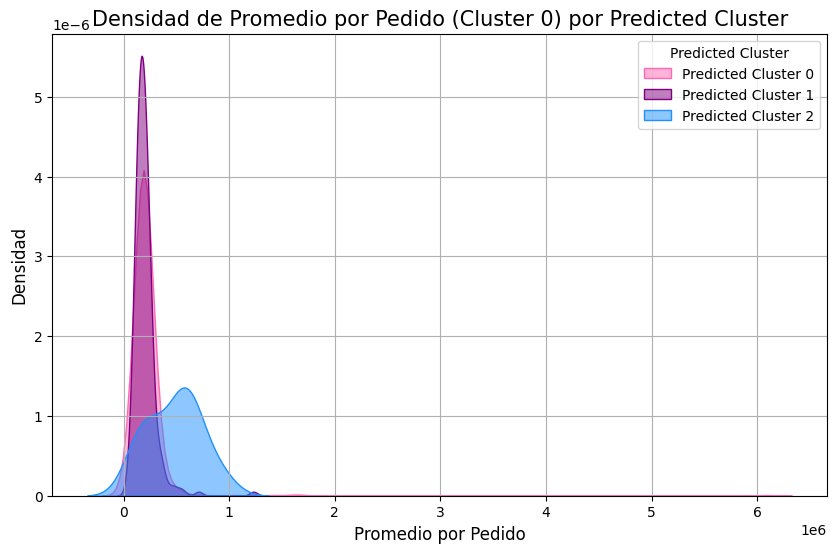

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que df_tiendas es tu DataFrame
# Filtrar registros donde cluster es 0
df_cluster_0 = df_tiendas[df_tiendas['cluster'] == 0]

# Definir colores para los clusters
cluster_color_map = {
    0: '#FF69B4',   # Cluster 0 (Rosa)
    1: 'purple',    # Cluster 1
    2: '#1E90FF',   # Cluster 2
}

# Crear el gráfico de densidad
plt.figure(figsize=(10, 6))

# Graficar primero la densidad del predicted cluster 0
sns.kdeplot(data=df_cluster_0[df_cluster_0['predicted_cluster'] == 0],
             x='promedio_por_pedido',
             fill=True,
             color=cluster_color_map[0],
             alpha=0.5,
             label='Predicted Cluster 0')

# Graficar la densidad para los otros clusters
for predicted_cluster in [1, 2]:  # Otros clusters
    sns.kdeplot(data=df_cluster_0[df_cluster_0['predicted_cluster'] == predicted_cluster],
                 x='promedio_por_pedido',
                 fill=True,
                 color=cluster_color_map[predicted_cluster],
                 alpha=0.5,
                 label=f'Predicted Cluster {predicted_cluster}')

# Añadir títulos y etiquetas
plt.title('Densidad de Promedio por Pedido (Cluster 0) por Predicted Cluster', fontsize=15)
plt.xlabel('Promedio por Pedido', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend(title='Predicted Cluster')
plt.grid(True)

# Mostrar el gráfico
plt.show()

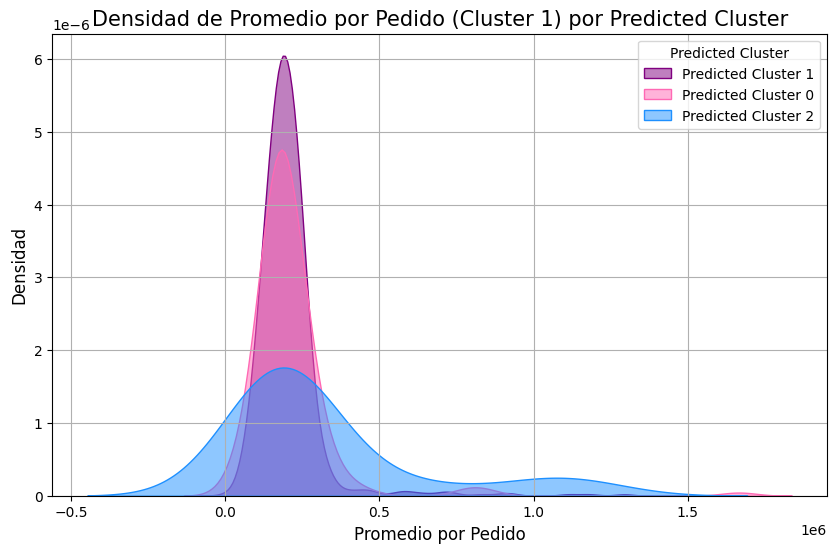

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que df_tiendas es tu DataFrame
# Filtrar registros donde cluster es 1
df_cluster_1 = df_tiendas[df_tiendas['cluster'] == 1]

# Definir colores para los clusters
cluster_color_map = {
    0: '#FF69B4',   # Cluster 0 (Rosa)
    1: 'purple',    # Cluster 1 (Purple)
    2: '#1E90FF',   # Cluster 2 (Dodger Blue)
}

# Crear el gráfico de densidad
plt.figure(figsize=(10, 6))

# Graficar primero la densidad del predicted cluster 1
sns.kdeplot(data=df_cluster_1[df_cluster_1['predicted_cluster'] == 1],
             x='promedio_por_pedido',
             fill=True,
             color=cluster_color_map[1],
             alpha=0.5,
             label='Predicted Cluster 1')

# Graficar la densidad para los otros clusters
for predicted_cluster in [0, 2]:  # Otros clusters
    sns.kdeplot(data=df_cluster_1[df_cluster_1['predicted_cluster'] == predicted_cluster],
                 x='promedio_por_pedido',
                 fill=True,
                 color=cluster_color_map[predicted_cluster],
                 alpha=0.5,
                 label=f'Predicted Cluster {predicted_cluster}')

# Añadir títulos y etiquetas
plt.title('Densidad de Promedio por Pedido (Cluster 1) por Predicted Cluster', fontsize=15)
plt.xlabel('Promedio por Pedido', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend(title='Predicted Cluster')
plt.grid(True)

# Mostrar el gráfico
plt.show()

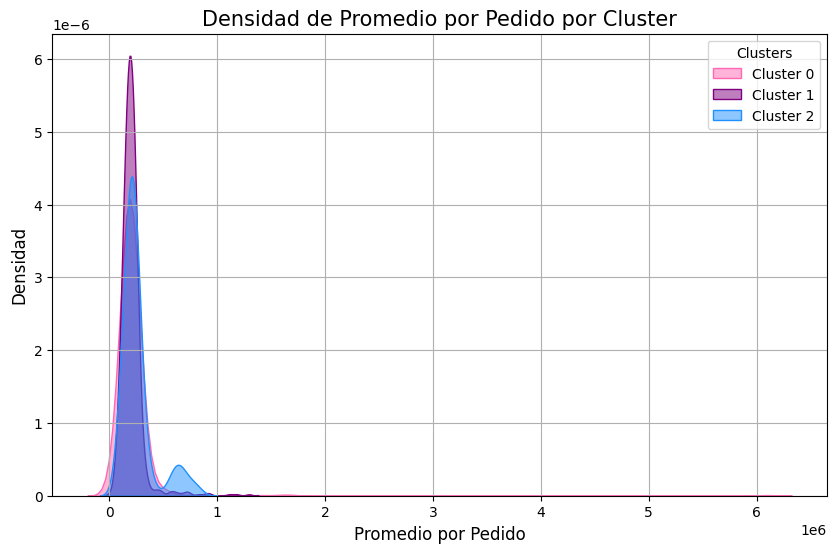

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que df_tiendas es tu DataFrame
# Filtrar registros donde cluster y predicted_cluster son iguales
df_filtered = df_tiendas[df_tiendas['cluster'] == df_tiendas['predicted_cluster']]

# Definir colores para los clusters
cluster_color_map = {
    0: '#FF69B4',   # Cluster 0 (Rosa)
    1: 'purple',   # Cluster 1
    2: '#1E90FF',   # Cluster 2 (Dodger Blue)
}

# Crear el gráfico de densidad
plt.figure(figsize=(10, 6))

# Graficar la densidad para cada cluster
for cluster, color in cluster_color_map.items():
    sns.kdeplot(data=df_filtered[df_filtered['cluster'] == cluster],
                 x='promedio_por_pedido',
                 fill=True,
                 color=color,
                 alpha=0.5,
                 label=f'Cluster {cluster}')

# Añadir títulos y etiquetas
plt.title('Densidad de Promedio por Pedido por Cluster', fontsize=15)
plt.xlabel('Promedio por Pedido', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend(title='Clusters')
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [9]:
df_filtered = df_tiendas[df_tiendas['cluster'] == df_tiendas['predicted_cluster']]

# Calcular el promedio de promedio_por_pedido por cluster
promedio_por_cluster = df_filtered.groupby('cluster')['promedio_por_pedido'].mean()

# Mostrar el resultado
print(promedio_por_cluster)

cluster
0    215721.603945
1    204109.314141
2    255717.190543
Name: promedio_por_pedido, dtype: float64


In [4]:
df_tiendas.columns

Index(['cantidad_ordenes', 'cantidad_proveedores', 'porcentaje_max_supplier',
       'promedio_ordenes_mes', 'porcentaje_descuento_total',
       'proporcion_ordenes_descuentos', 'promedio_por_pedido', 'customer_id',
       'cluster', 'predicted_cluster'],
      dtype='object')

In [ ]:
df_m1 = pd.read_csv('/content/drive/MyDrive/2024/2do Cuatri - 2024/Proyecto Final/TP Proyecto/Entrega 3/Codigo E3/tiendas_caba_v7.csv')

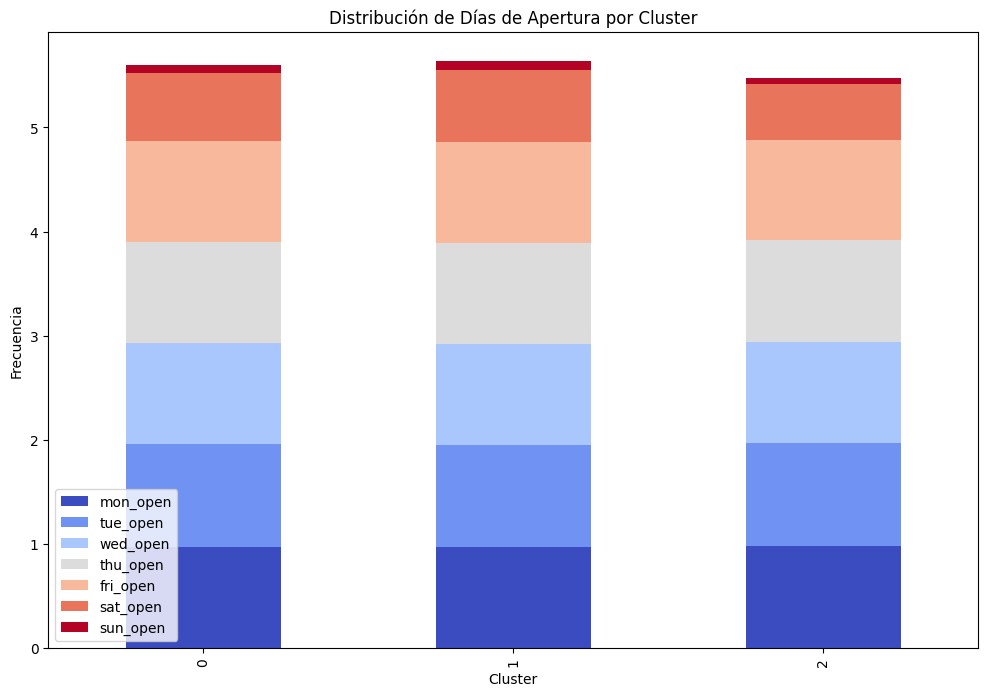

In [ ]:
# Días de apertura por cluster
dias_abiertos = ['mon_open', 'tue_open', 'wed_open', 'thu_open', 'fri_open', 'sat_open', 'sun_open']

# Calculamos la media de días abiertos por cluster
df_open_days = df_m1.groupby('cluster')[dias_abiertos].mean()

# Gráfico de barras apilado
df_open_days.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='coolwarm')
plt.title('Distribución de Días de Apertura por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frecuencia')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

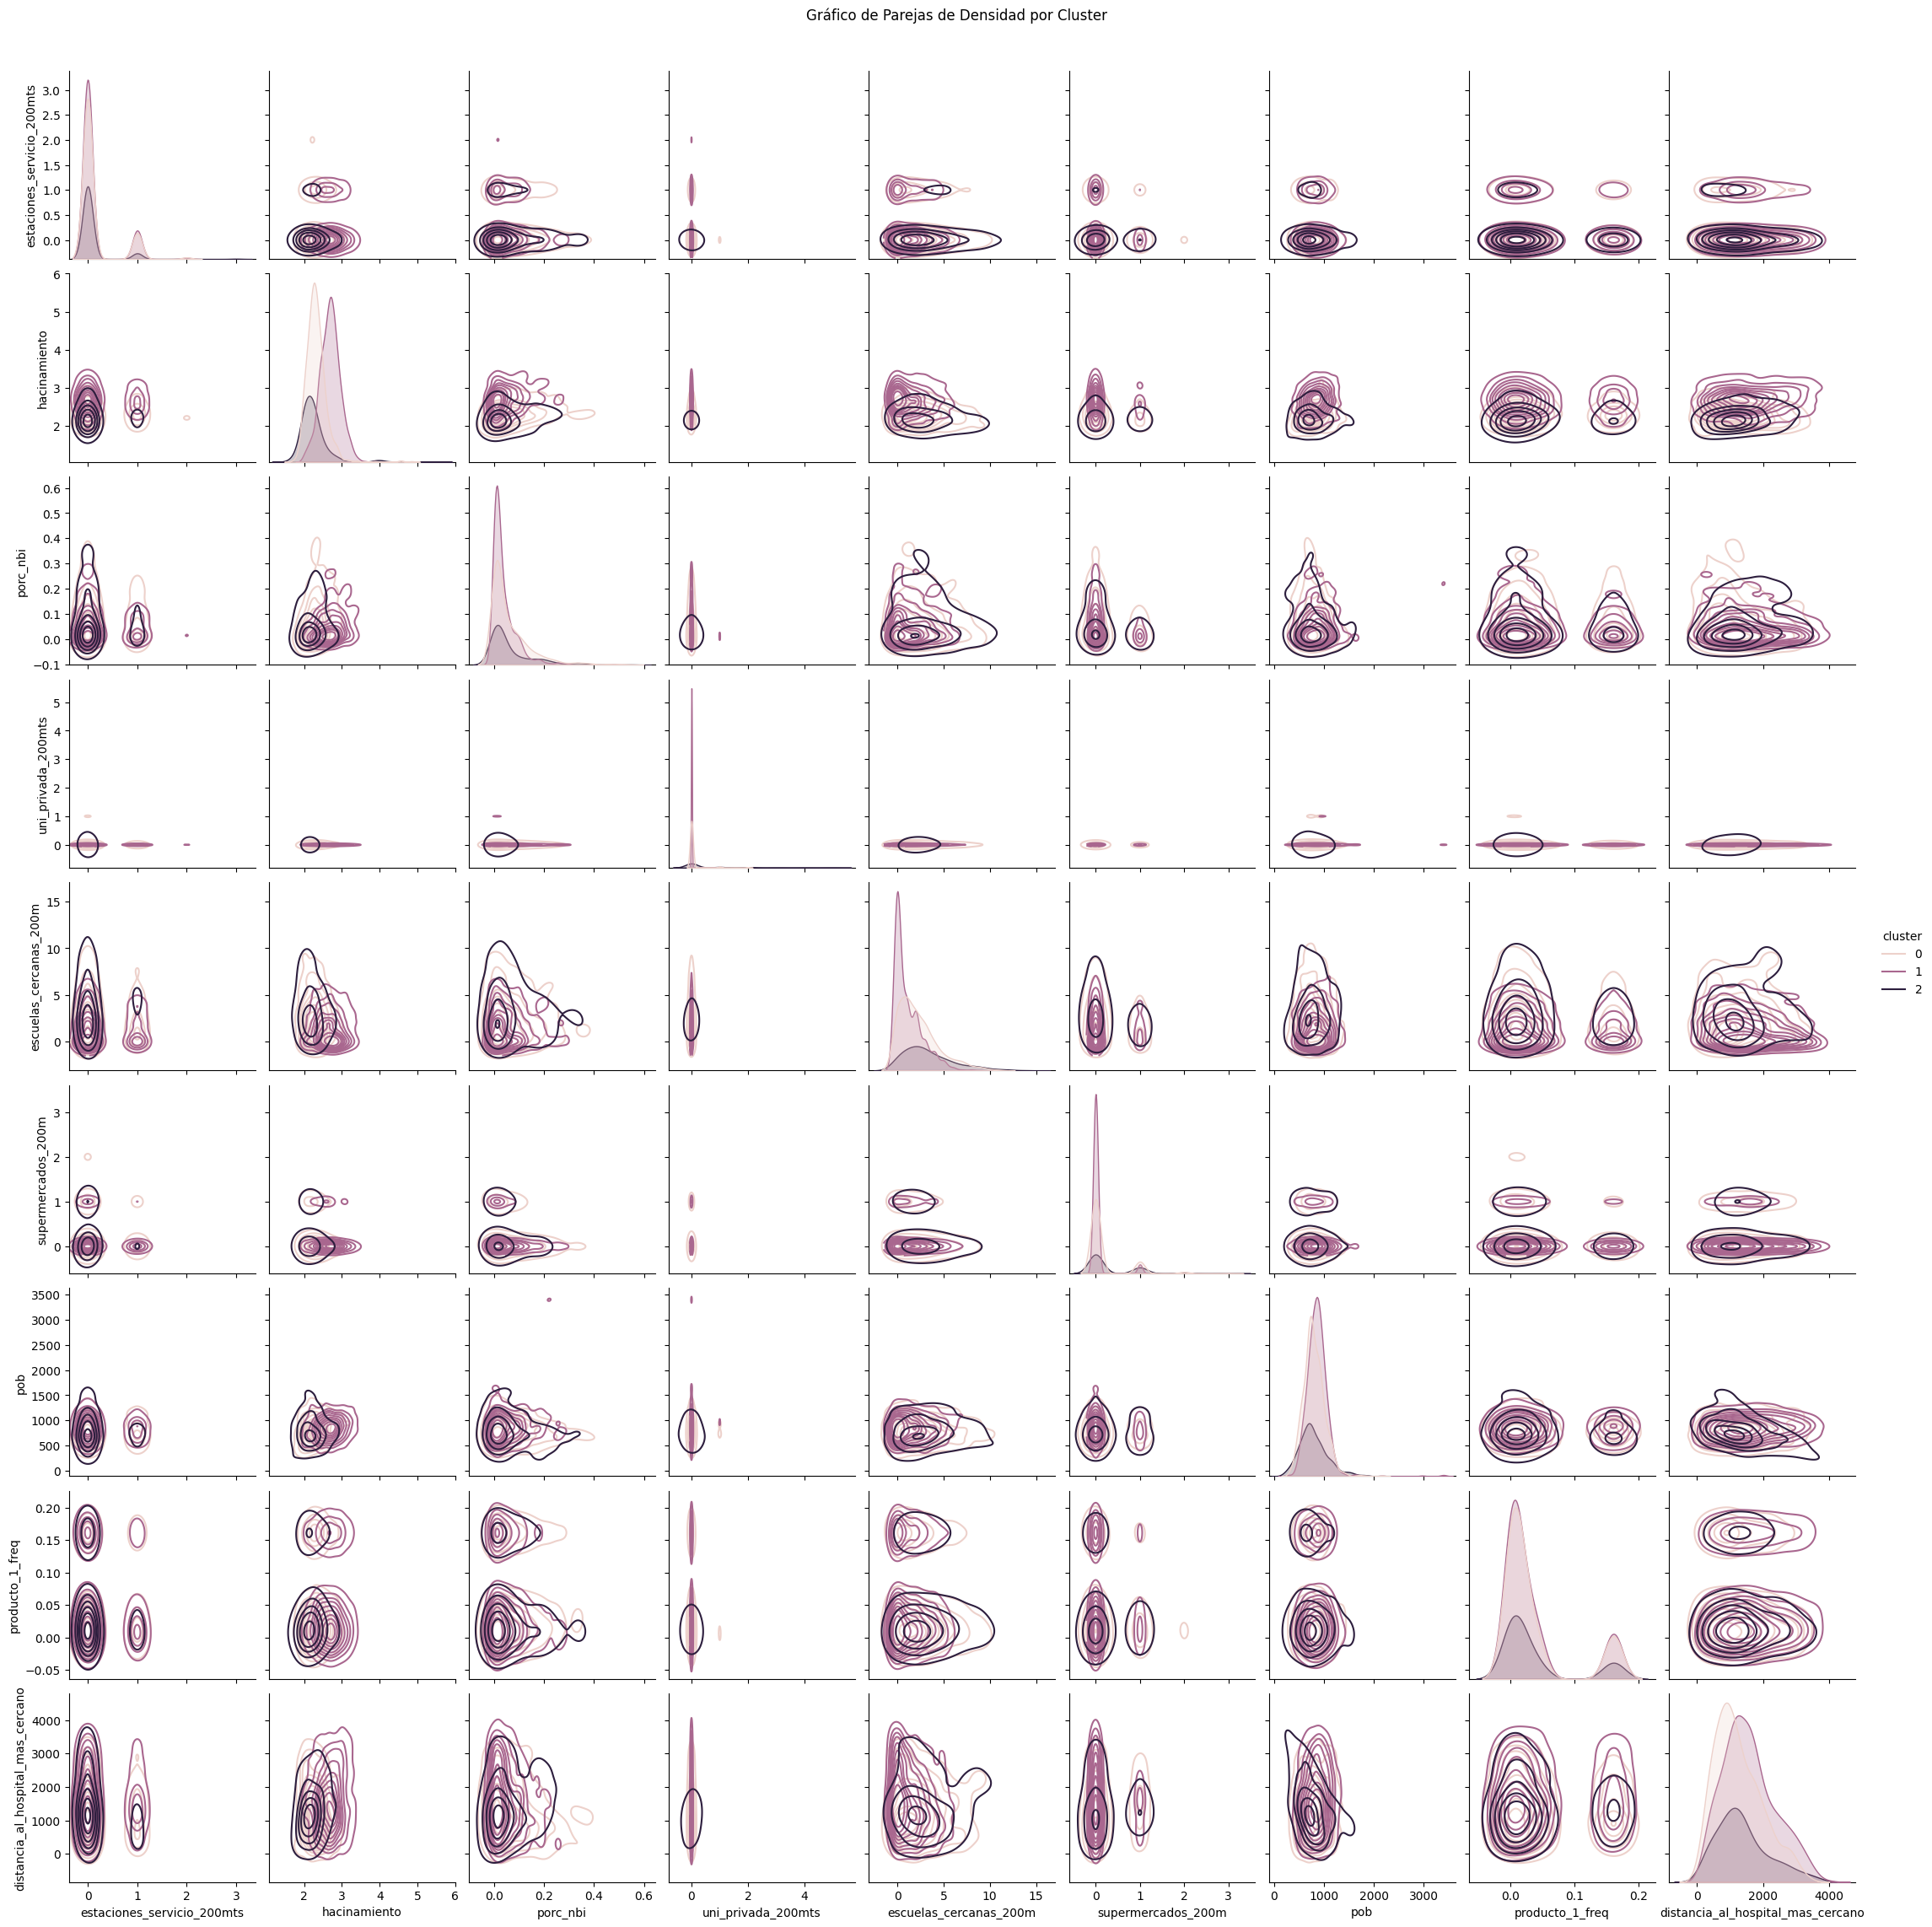

In [ ]:
# Pairplot con múltiples variables
sns.pairplot(df_m1, vars=variables, hue='cluster', kind='kde', height=2.5)
plt.suptitle('Gráfico de Parejas de Densidad por Cluster', y=1.02)
plt.show()